# Running MOLGW from python / jupyter notebook

In [1]:
# Loading the necessary modules
from molgw import Molgw_output_collection, Molgw_input
import numpy as np
import matplotlib.pyplot as plt

## Calculating some properties of H$_2$ as function of bond length

In [2]:
# Here are the common parameters
parameters = { 'scf': 'PBEh',
              'alpha_hybrid': 0.50,
              'basis': 'cc-pVTZ',
              'auxil_basis': 'auto',
              'postscf': 'GW',
              'selfenergy_state_range': 0  # just calculate GW for HOMO
             }

In [3]:
xxx = np.arange(0.3,2.01,0.05)   # H2 bond lengths in Angstroms
edft = []
erpa = []
mlgo_bondlength = Molgw_output_collection()
for x in xxx:
    # H2 molecule with varying bond length
    structure = f"H {x} 0. 0.\n" + "H 0. 0. 0.\n"
    parameters["xyz"] = structure
    # Create the input
    mlgi = Molgw_input(parameters)
    # Run the calculation here and store the results in mlgo
    mlgo = mlgi.run(tmp="tmp/")
    mlgo_bondlength.append(mlgo)
    edft.append(mlgo["scf energy"]["total"])
    erpa.append(mlgo["mbpt energy"]["total"])

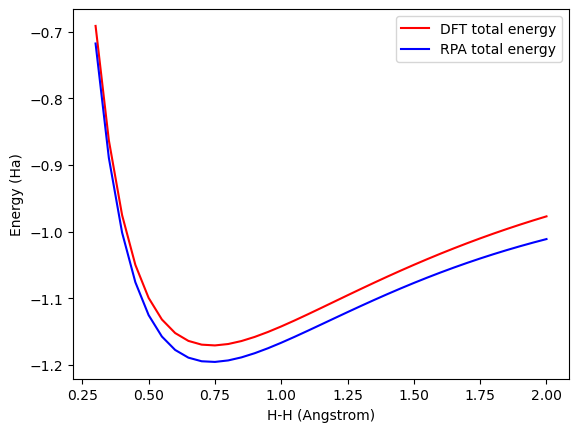

In [4]:
plt.plot(xxx,edft,color='red',label='DFT total energy')
plt.plot(xxx,erpa,color='blue',label='RPA total energy')
plt.legend()
plt.xlabel('H-H (Angstrom)')
plt.ylabel('Energy (Ha)')
plt.show()

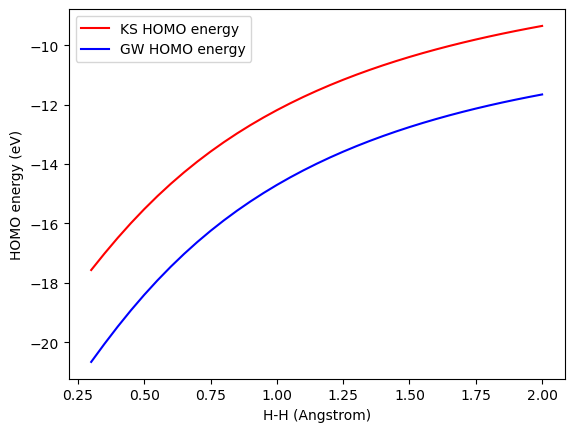

In [5]:
homo_ks = []
homo_gw = []
for mlgo in mlgo_bondlength:
    homo_ks.append(mlgo.homo_energy('gks'))
    homo_gw.append(mlgo.homo_energy('gw'))
plt.plot(xxx,homo_ks,color='red',label='KS HOMO energy')
plt.plot(xxx,homo_gw,color='blue',label='GW HOMO energy')
plt.legend()
plt.xlabel('H-H (Angstrom)')
plt.ylabel('HOMO energy (eV)')
plt.show()

## Basis set convergence study

In [6]:
# Here are the common parameters
parameters = { 'scf': 'PBEh',
              'alpha_hybrid': 0.94,  # PBEh(0.94) functional
              'auxil_basis': 'auto',
              'postscf': 'GW',
              'selfenergy_state_range': 0,  # just calculate GW for HOMO
              'xyz': f"H 0.75 0. 0.\nH 0. 0. 0.\n"
             }

In [7]:
# Use the Dunning basus family: cc-pVDZ, cc-pVTZ, etc.
cardinal_list = ['D', 'T', 'Q', '5', '6']
basis_list = [f'cc-pV{c}Z' for c in cardinal_list ]
mlgo_basis_conv = Molgw_output_collection()
for basis in basis_list:
    # H2 molecule with increasing basis set
    parameters["basis"] = basis
    # Run the calculation here and store the results in mlgo
    mlgo_basis_conv.append(Molgw_input(parameters).run(tmp="tmp/"))

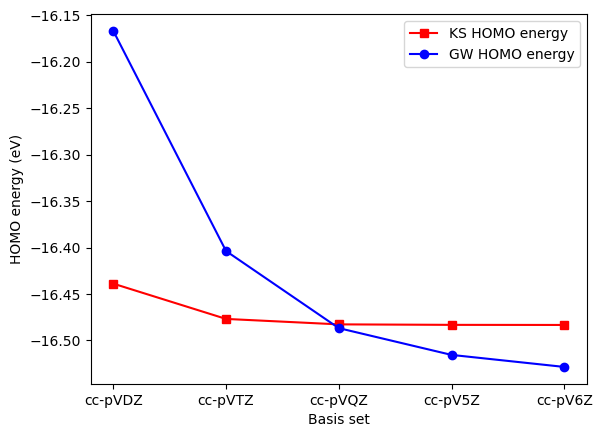

In [8]:
homo_ks = []
homo_gw = []
for mlgo in mlgo_basis_conv:
    homo_ks.append(mlgo.homo_energy('gks'))
    homo_gw.append(mlgo.homo_energy('gw'))
plt.plot(homo_ks,'s-',color='red',label='KS HOMO energy')
plt.plot(homo_gw,'o-',color='blue',label='GW HOMO energy')
plt.xticks(range(len(basis_list)),basis_list)
plt.legend()
plt.xlabel('Basis set')
plt.ylabel('HOMO energy (eV)')
plt.show()

Obviously, $GW$ converges **slowly**.